                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Кількість унікальних значень в колонці 'genre': 2
Non 

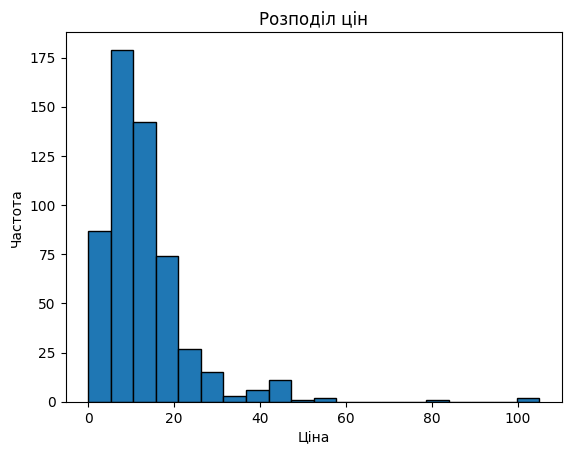

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Прочитайте csv файл (використовуйте функцію read_csv)
# Виведіть перші п'ять рядків (використовується функція head)
# Виведіть розміри датасету (використовуйте атрибут shape)
df = pd.read_csv('bestsellers with categories.csv')
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.head())
print(df.shape)
# Про скільки книг зберігає дані датасет? Відповідь: 351
# 
missing_values = df.isna().sum()
print(missing_values)
# Чи є в якихось змінних пропуски? Відповідь: ні
unique_genres = df['genre'].unique()
print("Кількість унікальних значень в колонці 'genre':", len(unique_genres))
for genre in unique_genres:
    print(genre)

# Які є унікальні жанри? Non Fiction, Fiction
df['price'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)
# Максимальна ціна? Відповідь: 105
# Мінімальна ціна? Відповідь: 0
# Середня ціна? Відповідь: 13.1
# Медіанна ціна? Відповідь: 11.0


In [20]:
import pandas as pd 

# Пошук та сортування даних
df = pd.read_csv('bestsellers with categories.csv')
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
max_rating = df['user_rating'].max()
print(max_rating)
#  Який рейтинг у датасеті найвищий? Відповідь: 4.9
books_same_rate = df['user_rating'].value_counts().get(4.9, 0)
print(books_same_rate)
# Скільки книг мають такий рейтинг? Відповідь: 52
max_reviews = df.loc[df['reviews'].idxmax()]['name']
print(max_reviews)
# Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
max_pricebook = df.loc[df['price'].idxmax()]['name']
print(max_pricebook)
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Diagnostic and Statistical Manual of Mental Disorders
fiction_top_50_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
count_fiction_top_50_2010 = len(fiction_top_50_2010)
print(count_fiction_top_50_2010)
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20
years_to_check = [2010, 2011]
high_rated_books_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin(years_to_check))]
count_high_rated_books_2010_2011 = len(high_rated_books_2010_2011)
print(count_high_rated_books_2010_2011)
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
books_2015_under_8_dollars = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books_2015_under_8_dollars = books_2015_under_8_dollars.sort_values(by='price')

print("Книги, які потрапили до рейтингу в 2015 році та коштують менше за 8 доларів (відсортовані за зростанням ціни):")
print(sorted_books_2015_under_8_dollars[['name', 'price']])
# Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

4.9
52
Where the Crawdads Sing
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5
20
1
Книги, які потрапили до рейтингу в 2015 році та коштують менше за 8 доларів (відсортовані за зростанням ціни):
                                                  name  price
507                              To Kill a Mockingbird      0
210                      Laugh-Out-Loud Jokes for Kids      4
206                         Knock-Knock Jokes for Kids      4
111                                    First 100 Words      4
123                               Giraffes Can't Dance      4
54   Creative Haven Creative Cats Coloring Book (Ad...      4
63                      Dear Zoo: A Lift-the-Flap Book      5
89   Dover Creative Haven Art Nouveau Animal Design...      5
478                        The Very Hungry Caterpillar      5
201  Killing Reagan: The Violent Assault That Chang...      5
28                        Baby Touch and Feel: Animals      5
224                                

In [25]:
# Агрегування даних та з'єднання таблиць
import pandas as pd

df = pd.read_csv('bestsellers with categories.csv')
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
genre_price_stats = df.groupby('genre').agg({'price': ['min', 'max']})
print(genre_price_stats)
# Максимальна ціна для жанру Fiction: Відповідь 82
# Мінімальна ціна для жанру Fiction: Відповідь 0
# Максимальна ціна для жанру Non Fiction: Відповідь 105
# Мінімальна ціна для жанру Non Fiction: Відповідь 0'
author_books_count = df.groupby('author').agg({'name': 'count'})
author_books_count = author_books_count.rename(columns={'name': 'book_count'})
print(author_books_count)
# Якої розмірності вийшла таблиця? Відповідь: 248 rows x 1 columns
# Який автор має найбільше книг? Відповідь: Walter Isaacson Wizards RPG Team
# Скільки книг цього автора? Відповідь: 3
author_avg_rating = df.groupby('author').agg({'user_rating': 'mean'})
author_avg_rating = author_avg_rating.rename(columns={'user_rating': 'avg_rating'})
print("Середній рейтинг для кожного автора:")
print(author_avg_rating)
# У якого автора середній рейтинг мінімальний? Відповідь: Adam Gasiewski
avg_rating_for_author = author_avg_rating.loc['Adam Gasiewski', 'avg_rating']

print(f"Середній рейтинг для автора 'Adam Gasiewski': {avg_rating_for_author}")
# Який у цього автора середній рейтинг? Відповідь: 4.4

merged_df = pd.concat([author_books_count, author_avg_rating], axis=1)
print("Датафрейм, що об'єднує кількість книг та середній рейтинг для кожного автора:")
print(merged_df)

sorted_df = merged_df.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])
print("\nДатафрейм, відсортований за кількістю книг та рейтингом:")
print(sorted_df)

# Який автор перший у списку? Відповідь: Muriel Barbery

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105
                            book_count
author                                
Abraham Verghese                     2
Adam Gasiewski                       1
Adam Mansbach                        1
Adir Levy                            1
Admiral William H. McRaven           1
...                                ...
Walter Isaacson                      3
William Davis                        2
William P. Young                     2
Wizards RPG Team                     3
Zhi Gang Sha                         2

[248 rows x 1 columns]
Середній рейтинг для кожного автора:
                            avg_rating
author                                
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
...                                ...
Walte